# Updated Model Comparison Notebook

This notebook reads metric CSV files for different models and compares their performance across feature sets. Index reading issue fixed with `index_col=0`.

=== Descriptive Statistics ===
   model         method  accuracy_mean  accuracy_std  precision_mean  \
0    KNN       Baseline           0.57      0.057009        0.630635   
1    KNN  FeatureSelect           0.76      0.129422        0.800190   
2    KNN            PCA           0.56      0.041833        0.606254   
3     NN       Baseline           0.68      0.238747        0.669429   
4     NN  FeatureSelect           0.47      0.152480        0.347206   
5     NN            LDA           0.90      0.117260        0.877079   
6     NN            PCA           0.59      0.258360        0.566095   
7     RF       Baseline           0.80      0.079057        0.853143   
8     RF  FeatureSelect           0.77      0.120416        0.781333   
9     RF            PCA           0.72      0.090830        0.771810   
10   SVC       Baseline           0.73      0.144049        0.768000   
11   SVC  FeatureSelect           0.78      0.083666        0.804000   
12   SVC            PCA          

<Figure size 1000x500 with 0 Axes>

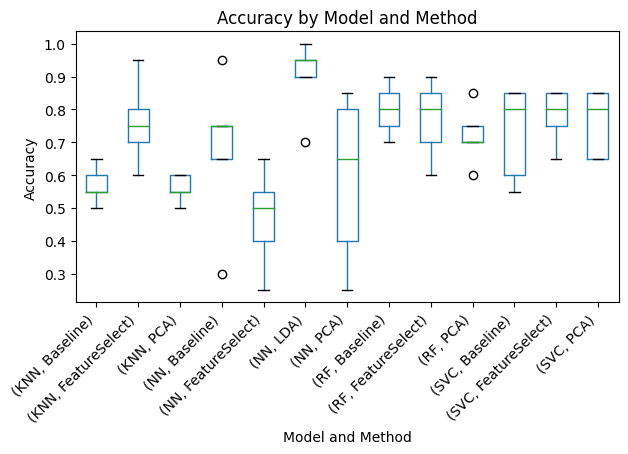

<Figure size 1000x500 with 0 Axes>

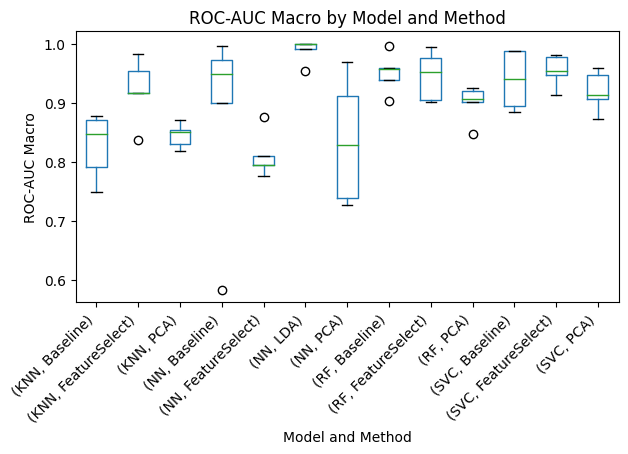

In [16]:
# 1. Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Paths
paths = {
    'KNN': './knn_comparison_metrics.csv',
    'RF':  './rf_comparison_metrics.csv',
    'SVC':'./svc_comparison_metrics.csv',
    'NN':'./nn_comparison_metrics.csv',

}

# 3. Read CSV
dfs = []
for model, path in paths.items():
    df = pd.read_csv(path)
    df['model'] = model
    dfs.append(df)

# 4. Concat
df = pd.concat(dfs, ignore_index=True)
df['method'] = df['method'].replace({
    'FS': 'FeatureSelect',
    'f_select': 'FeatureSelect',
    'FeatureSelect': 'FeatureSelect',
    'PCA': 'PCA',
    'Baseline': 'Baseline'
})

# 5. Stadistics 
summary = (
    df
    .groupby(['model','method'])
    .agg(
        accuracy_mean=('accuracy','mean'),
        accuracy_std =('accuracy','std'),
        precision_mean=('precision_macro','mean'),
        precision_std =('precision_macro','std'),
        recall_mean=('recall_macro','mean'),
        recall_std =('recall_macro','std'),
        f1_mean=('f1_macro','mean'),
        f1_std =('f1_macro','std'),
        roc_auc_mean=('roc_auc_macro','mean'),
        roc_auc_std =('roc_auc_macro','std'),
    )
    .reset_index()
)

# 6. Summary
print("=== Descriptive Statistics ===")
print(summary)

# 7. Boxplot Accuracy
plt.figure(figsize=(10,5))
df.boxplot(column='accuracy', by=['model','method'], grid=False)
plt.title('Accuracy by Model and Method')
plt.suptitle('')            # quita el título automático
plt.xlabel('Model and Method')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 8. Boxplot ROC-AUC_macro
plt.figure(figsize=(10,5))
df.boxplot(column='roc_auc_macro', by=['model','method'], grid=False)
plt.title('ROC-AUC Macro by Model and Method')
plt.suptitle('')
plt.xlabel('Model and Method')
plt.ylabel('ROC-AUC Macro')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()